In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
year = 2024

### OFFENSE

In [3]:
nfl_teams=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", 
           "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LA", "MIA", 
           "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", 
           "TEN", "WAS"]

ep_sets = []
down = 1
distance = 10

unfinished = []
for team in nfl_teams:
    try:
        ep_set_df = pd.read_csv('team_data/team-data'+str(year)+'/'+team+'/norm_eps.csv')
        ep_set = ep_set_df[ep_set_df['Down'] == down]
        ep_set = ep_set[((ep_set['Distance'] == distance) & (ep_set['Yardline'] >= distance)) | ((ep_set['Yardline'] < distance) 
                                                                                                    & (ep_set['Distance'] == ep_set['Yardline']))]
        ep_sets.append((team, ep_set))
    except:
        unfinished.append(team)
        pass

nfl = pd.read_csv('league_data/NFL'+str(year)+'/final_eps.csv')
ep_set_nfl = nfl[nfl['Down'] == down]
ep_set_nfl = ep_set_nfl[((ep_set_nfl['Distance'] == distance) & (ep_set_nfl['Yardline'] >= distance)) | ((ep_set_nfl['Yardline'] < distance) 
                                                                                                   & (ep_set_nfl['Distance'] == ep_set_nfl['Yardline']))]
#ep_sets.append(("NFL", ep_set_nfl))

print(unfinished)

[]


In [4]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['DET', 'BAL', 'TB', 'CIN', 'BUF', 'PHI', 'ARI', 'LA', 'LAC', 'MIN', 'WAS', 'ATL', 'GB', 'CAR', 'SF', 'KC', 'JAX', 'PIT', 'DEN', 'NYJ', 'MIA', 'NE', 'HOU', 'CHI', 'SEA', 'NO', 'DAL', 'LV', 'NYG', 'TEN', 'IND', 'CLE']


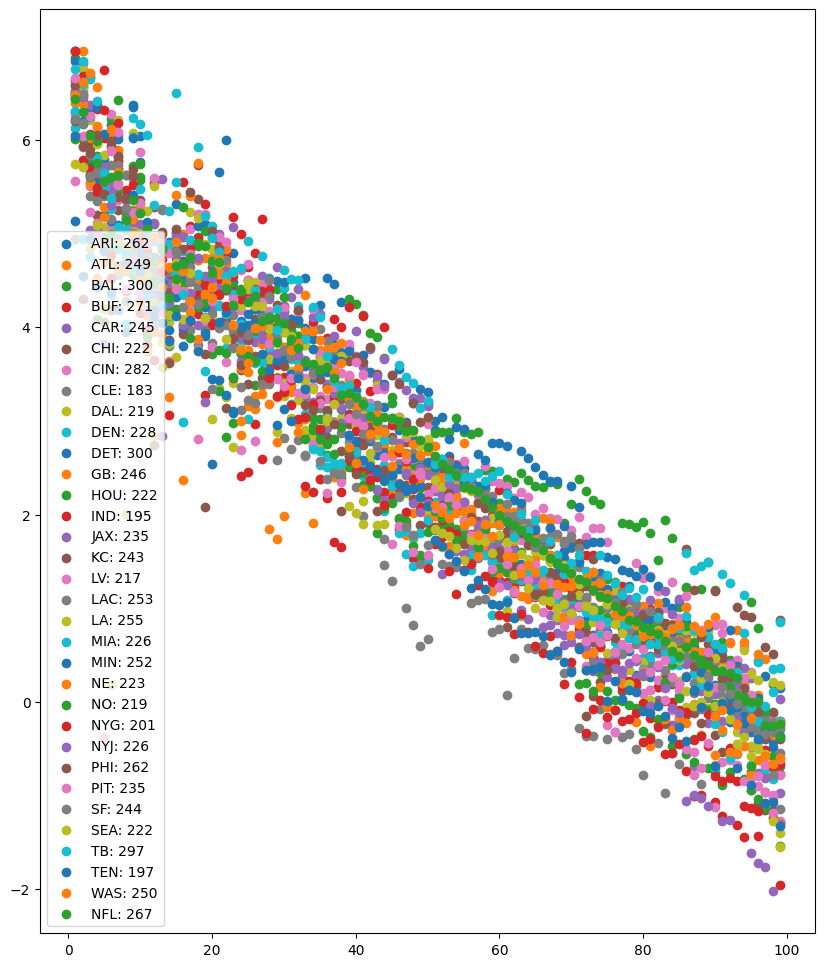

In [5]:
plt.figure(figsize=(10, 12))

for ep_set in ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

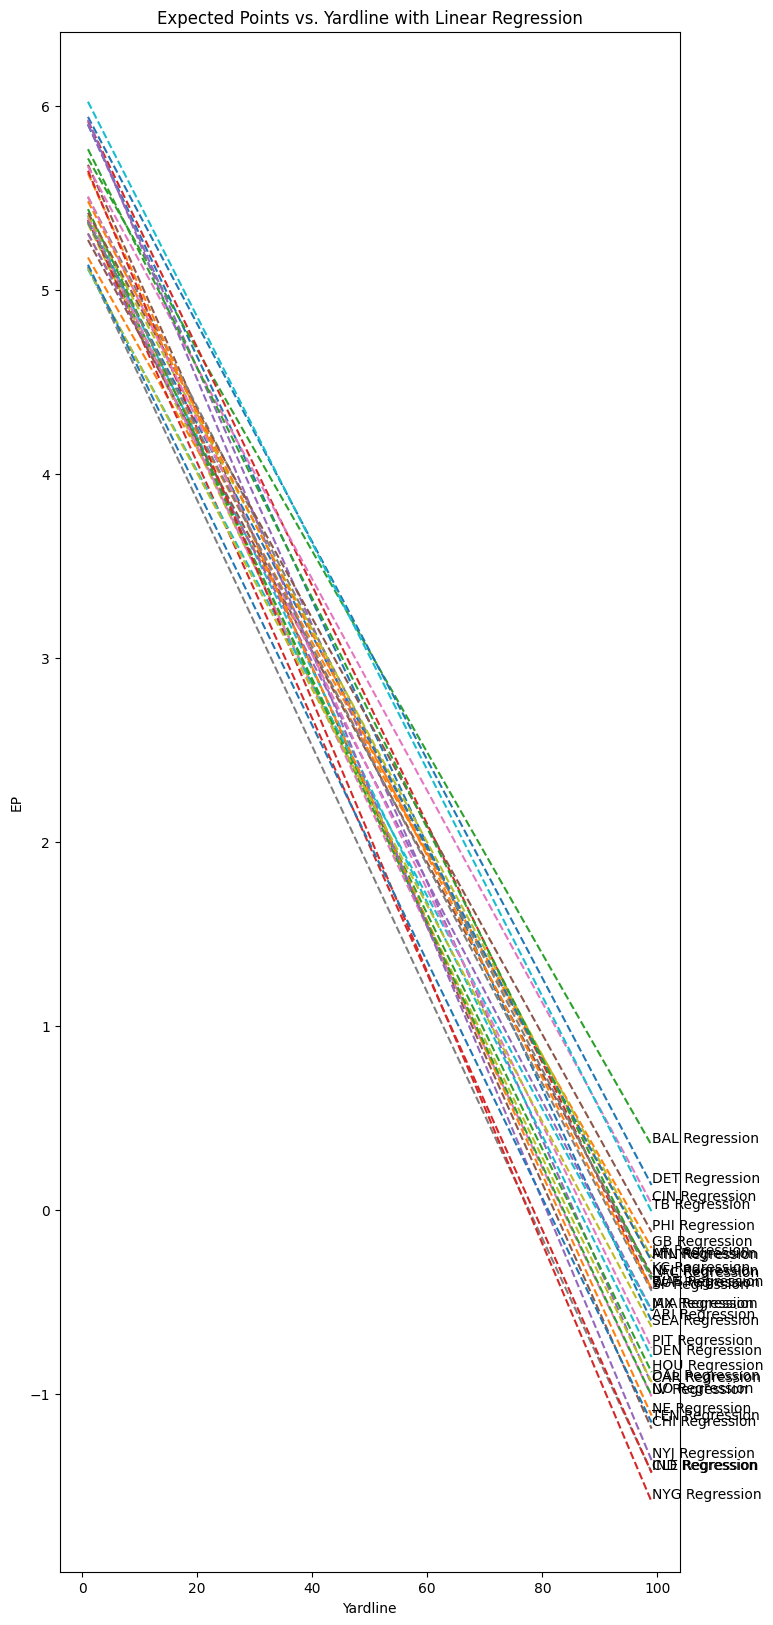

In [6]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [7]:
# Create a list of (name, total_EP) tuples
ep_sums = [(name, np.sum(df['EP'])) for name, df in ep_sets]

# Sort by total_EP
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)  # reverse=True for descending

# Print results
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")


DET: 300.93
BAL: 300.47
TB: 297.88
CIN: 282.59
BUF: 271.82
PHI: 262.50
ARI: 262.16
LA: 255.10
LAC: 253.95
MIN: 252.07
WAS: 250.34
ATL: 249.12
GB: 246.20
CAR: 245.50
SF: 244.27
KC: 243.79
JAX: 235.96
PIT: 235.73
DEN: 228.11
NYJ: 226.19
MIA: 226.14
NE: 223.78
HOU: 222.57
CHI: 222.53
SEA: 222.14
NO: 219.48
DAL: 219.09
LV: 217.02
NYG: 201.26
TEN: 197.29
IND: 195.85
CLE: 183.42


In [8]:
freq_df = pd.read_csv("naive_frequency.csv")

In [9]:
# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
ep_sums = []
for name, df in ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)
rank = 1
for name, total in ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

 1: DET: 2.93
 2: BAL: 2.88
 3: TB : 2.81
 4: CIN: 2.76
 5: BUF: 2.57
 6: ARI: 2.45
 7: MIN: 2.43
 8: LAC: 2.42
 9: LA : 2.40
10: WAS: 2.35
11: SF : 2.34
12: GB : 2.34
13: PHI: 2.33
14: ATL: 2.32
15: KC : 2.29
16: CAR: 2.27
17: JAX: 2.17
18: PIT: 2.17
19: SEA: 2.15
20: HOU: 2.14
21: NYJ: 2.13
22: MIA: 2.09
23: DEN: 2.08
24: NE : 2.03
25: DAL: 2.02
26: CHI: 2.01
27: LV : 1.99
28: NO : 1.92
29: IND: 1.83
30: TEN: 1.77
31: NYG: 1.76
32: CLE: 1.50


### DEFENSE

In [10]:
def_ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        def_ep_set_df = pd.read_csv('team_data/team-data'+str(year)+'/'+team+'/norm_def_eps.csv')
        def_ep_set = def_ep_set_df[def_ep_set_df['Down'] == down]
        def_ep_set = def_ep_set[((def_ep_set['Distance'] == distance) & (def_ep_set['Yardline'] >= distance)) | ((def_ep_set['Yardline'] < distance) 
                                                                                                    & (def_ep_set['Distance'] == def_ep_set['Yardline']))]
        def_ep_sets.append((team, def_ep_set))
    except:
        unfinished.append(team)
        pass

print(unfinished)

[]


In [11]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(def_ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['JAX', 'CAR', 'SF', 'ATL', 'ARI', 'CIN', 'NYG', 'NE', 'MIA', 'SEA', 'TEN', 'CLE', 'DAL', 'NO', 'LV', 'LA', 'KC', 'PIT', 'CHI', 'BAL', 'TB', 'NYJ', 'DET', 'HOU', 'WAS', 'BUF', 'IND', 'LAC', 'GB', 'MIN', 'PHI', 'DEN']


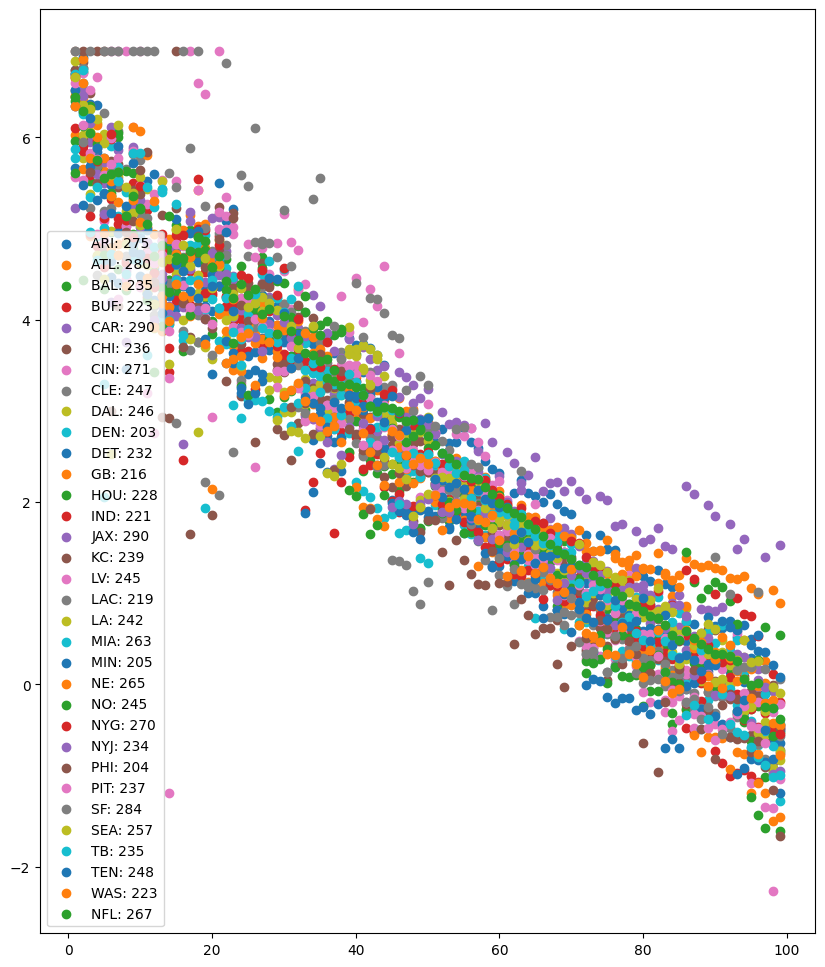

In [12]:
plt.figure(figsize=(10, 12))

for ep_set in def_ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

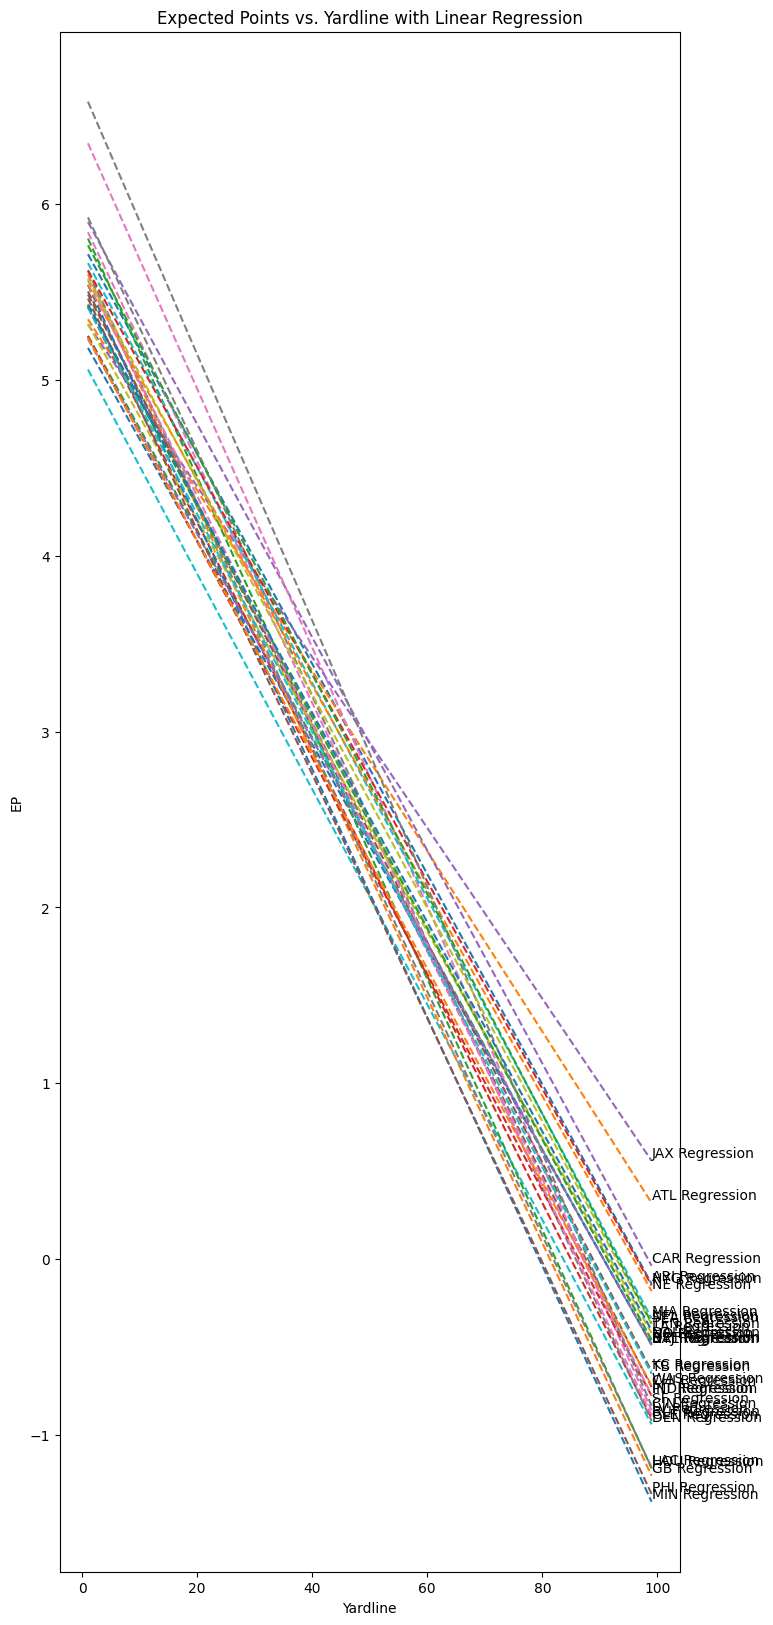

In [13]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in def_ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [14]:
# Create a list of (name, total_EP) tuples
def_ep_sums = [(name, np.sum(df['EP'])) for name, df in def_ep_sets]

# Sort by total_EP
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)  # reverse=False for ascending

# Print results
for name, total in def_ep_sums_sorted:
    print(f"{name}: {total:.2f}")

DEN: 203.90
PHI: 204.27
MIN: 205.91
GB: 216.20
LAC: 219.46
IND: 221.31
BUF: 223.21
WAS: 223.71
HOU: 228.37
DET: 232.62
NYJ: 234.87
TB: 235.58
BAL: 235.73
CHI: 236.41
PIT: 237.33
KC: 239.97
LA: 242.40
LV: 245.14
NO: 245.57
DAL: 246.08
CLE: 247.69
TEN: 248.61
SEA: 257.81
MIA: 263.70
NE: 265.30
NYG: 270.97
CIN: 271.54
ARI: 275.94
ATL: 280.44
SF: 284.55
CAR: 290.11
JAX: 290.83


In [ ]:
freq_df = pd.read_csv("naive_frequency.csv")

# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
def_ep_sums = []
for name, df in def_ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    def_ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)
rank = 1
for name, total in def_ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

KeyError: 'Down'

### Cumulative Ranking

In [ ]:
# Convert both lists to dictionaries
off_dict = dict(ep_sums_sorted)
def_dict = dict(def_ep_sums_sorted)

# Compute the difference per team (offense - defense)
diff_sums = []
for team in off_dict:
    diff = off_dict[team] - def_dict.get(team, 0)
    diff_sums.append((team, diff))

# Sort and print the differences in descending order
diff_sums_sorted = sorted(diff_sums, key=lambda x: x[1], reverse=True)

for rank, (team, diff) in enumerate(diff_sums_sorted, start=1):
    print(f"{rank:2d}: {team:<3}: {diff:.2f}")

 1: DET: 0.97
 2: TB : 0.73
 3: WAS: 0.62
 4: BUF: 0.56
 5: LAC: 0.54
 6: BAL: 0.42
 7: PHI: 0.39
 8: PIT: 0.38
 9: MIN: 0.37
10: SEA: 0.25
11: LA : 0.24
12: NYJ: 0.13
13: KC : 0.12
14: GB : 0.12
15: ARI: 0.03
16: CIN: -0.04
17: TEN: -0.13
18: DEN: -0.18
19: CHI: -0.23
20: LV : -0.24
21: IND: -0.28
22: NE : -0.34
23: CAR: -0.40
24: HOU: -0.40
25: DAL: -0.44
26: ATL: -0.46
27: JAX: -0.50
28: MIA: -0.57
29: CLE: -0.65
30: NO : -0.66
31: NYG: -0.81
32: SF : -1.30


In [ ]:
# Convert each list to a DataFrame
off_df = pd.DataFrame(ep_sums_sorted, columns=["Team", "Offensive AEP"])
def_df = pd.DataFrame(def_ep_sums_sorted, columns=["Team", "Defensive AEP"])

# Merge on Team
merged_df = pd.merge(off_df, def_df, on="Team")

# Sort alphabetically by team name
merged_df = merged_df.sort_values(by="Team").reset_index(drop=True)

print(merged_df)

merged_df.to_csv('AEPs/nfl'+str(year)+'.csv')


   Team  Offensive AEP  Defensive AEP
0   ARI       2.687377       2.653776
1   ATL       2.047505       2.508190
2   BAL       2.520868       2.101495
3   BUF       2.537915       1.978314
4   CAR       2.489149       2.890165
5   CHI       1.816291       2.047065
6   CIN       2.490976       2.526805
7   CLE       1.702254       2.351792
8   DAL       1.783004       2.219145
9   DEN       1.837490       2.017750
10  DET       2.752184       1.783529
11   GB       1.913098       1.796642
12  HOU       1.919360       2.320664
13  IND       1.486244       1.764001
14  JAX       2.270398       2.770715
15   KC       2.223124       2.101515
16   LA       2.502083       2.257610
17  LAC       2.591200       2.046737
18   LV       1.975249       2.216077
19  MIA       1.804450       2.376025
20  MIN       2.136332       1.768885
21   NE       2.237475       2.575948
22   NO       1.800282       2.461821
23  NYG       1.658643       2.470573
24  NYJ       2.141122       2.007855
25  PHI     

In [ ]:
# Output TypeScript-style arrays for use in your frontend

offense_vals = merged_df["Offensive AEP"].tolist()
defense_vals = merged_df["Defensive AEP"].tolist()

# Format as exportable JS arrays
def format_array(name, arr):
    formatted = ", ".join(f"{x:.2f}" for x in arr)
    return f"export const {name} = [\n    {formatted}\n]"

print(format_array("offenseValues"+str(year), offense_vals))
print(format_array("defenseValues"+str(year), defense_vals))


export const offenseValues2024 = [
    2.69, 2.05, 2.52, 2.54, 2.49, 1.82, 2.49, 1.70, 1.78, 1.84, 2.75, 1.91, 1.92, 1.49, 2.27, 2.22, 2.50, 2.59, 1.98, 1.80, 2.14, 2.24, 1.80, 1.66, 2.14, 2.42, 2.35, 2.30, 1.95, 2.88, 2.01, 2.53
]
export const defenseValues2024 = [
    2.65, 2.51, 2.10, 1.98, 2.89, 2.05, 2.53, 2.35, 2.22, 2.02, 1.78, 1.80, 2.32, 1.76, 2.77, 2.10, 2.26, 2.05, 2.22, 2.38, 1.77, 2.58, 2.46, 2.47, 2.01, 2.03, 1.97, 2.05, 3.25, 2.16, 2.15, 1.91
]
